# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

df = pd.read_csv('human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## 1. Is the distribution of body temperatures normal?
To determine if the given data are normally distributed, I both plot the data and use a stats test.  These provide both visual and statistical evidence that the dataset is indeed normally distributed.

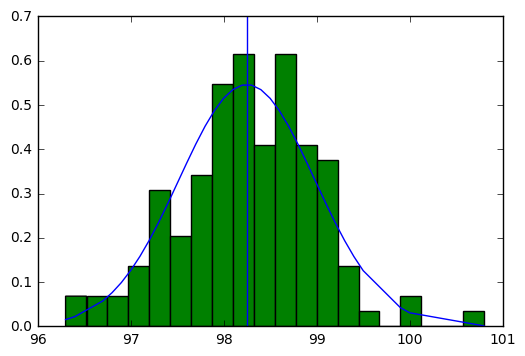

Mean = 98.24923076923076
Standard Deviation = 0.7303577789050376


NormaltestResult(statistic=2.7038014333192359, pvalue=0.25874798634882118)

In [4]:
#sort values so they can be plotted in a line to show distribution
df = df.sort_values(by='temperature')
temp = df.temperature
#establish mean and standard deviation
std = np.std(temp) 
mean = np.mean(temp)
#Creates and plots a normal distribution based on the temp data over the histogram
fit = stats.norm.pdf(temp, mean, std)
plt.plot(temp,fit)
#Creates the histogram with a line at the mean
plt.hist(temp,normed=True, bins=20)
plt.axvline(temp.mean())
plt.show()
#Print mean and std
print('Mean =',mean)
print('Standard Deviation =',std)
#Stats test of the data against a real normal distribution to support the normal distribution hypothesis (p>0.05)
stats.mstats.normaltest(temp, axis=0)

## 2. Is the sample size large? Are the observations independent? 
Since the data are normally distributed, a sample size of at least 30 should be sufficient for statistical testing.  Therefore our n-size of 130 is more than large enough for statistical inference.  

According to the source article, the original author "measured 148 subjects' normal temperatures taken at several different times during two consecutive days, resulting in 700 total readings". These 700 readings were proportionally reduced to 130 by the author of this exercise.  I believe that the steps taken by the original author - taking temperatures multiple times during the day for two days - greatly reduce the threat of an effect of time of day on the sample distribution, therefore it is safe to say that observations are independent.

In [5]:
#Prints the sample size of our dataset.
print('n =',len(df.index))

n = 130


# 3. Is the true population mean really 98.6 degrees F? 
 - **Would you use a one-sample or two-sample test? Why?**
    Since we already know that our null hypothesis mean is 98.6 (and therefore we are comparing one sample to a   known null value, not two samples), we should use a one-sample test.  
    
    
 - **In this situation, is it appropriate to use the *t* or *z* statistic?**
     Since we do not have the standard deviation for the total population, it is appropriate to use a *t* statistic.
 
 
 - **Now try using the other test. How will the result be different? Why?**
     A z-test is not possible because we do not have the standard deviation of the total human population available.

In [6]:
sample_mean = np.mean(df.temperature)
print('Sample mean =',sample_mean)
null_mean = 98.6
print('Null mean =',null_mean)
standard_error = stats.sem(df.temperature)
print('Standard error =',standard_error)
t = (sample_mean - null_mean)/standard_error
print('t = (sample mean - null mean)/standard_error')
print('t =',t)
print('p < 0.001')

Sample mean = 98.24923076923076
Null mean = 98.6
Standard error = 0.0643044168379
t = (sample mean - null mean)/standard_error
t = -5.45482329236
p < 0.001


# 4. At what temperature should we consider someone's temperature to be "abnormal"?
I began by calculating t-critical at alpha 0.05 using a t-value calculator at http://stattrek.com/online-calculator/t-distribution.aspx.  I then calculated margin of error by multiplying t-critical by the standard error.  The 95% CI is the sample mean +- the margin of error: 98.249 +- 0.127, or 98.123-98.376.  Therefore, we would consider someone's temperature to be "abnormal" if their temperature was below 98.123 or above 98.376.

In [7]:
t_critical = 1.979
standard_error = stats.sem(df.temperature)
ample_mean = np.mean(df.temperature)
print('t-critical at alpha 0.05 with 129 degrees of freedom =',t_critical)
margin_of_error = t_critical * standard_error
print('Margin of error =',margin_of_error)
print('Confidence interval =',sample_mean,'+-',margin_of_error)

t-critical at alpha 0.05 with 129 degrees of freedom = 1.979
Margin of error = 0.127258440922
Confidence interval = 98.24923076923076 +- 0.127258440922


# 5. Is there a significant difference between males and females in normal temperature?
 - **What test did you use and why?**
 I used a two-sample t-test because we are comparing two unknown populations.
 - **Write a story with your conclusion in the context of the original problem. **
 I found that there is no statistically significant difference between males and females in normal temperature (p > 0.05), although in this sample females had a slighly higher body temperature, by about 0.3 degrees farenheit.  However, the p value was still relatively low at 0.111, and the original data were based on a smaller number of female than male subjects, so in order to come to a more definitive conclusion on whether or not there is a difference in male and female body temperature I would recommend replicating this study with a greater number of female subjects.

In [9]:
males = df[df['gender'] == 'M']
females = df[df['gender'] == 'F']
male_mean = np.mean(males.temperature)
female_mean = np.mean(females.temperature)
print('Male mean temperature =',male_mean)
print('Female mean temperature =',female_mean)
male_se = stats.sem(males.temperature)
female_se = stats.sem(females.temperature)
print('Male standard error =',male_se)
print('Female standard error =',female_se)
t = (male_mean-female_mean)/(male_se+female_se)
print('t = (male mean-female mean)/(male standard error+female standard error)')
print('t =',t)
print('p =', 0.111)

Male mean temperature = 98.1046153846154
Female mean temperature = 98.39384615384616
Male standard error = 0.0866699855229
Female standard error = 0.0922183060804
t = (male mean-female mean)/(male standard error+female standard error)
t = -1.616823363
p = 0.111
